# Adult Pandas

Welcome to the advanced Pandas course! 

We're going to look at the final stages of analysing our beer data:
- Pivoting
- Visualizing
- Presenting

That will mark the end of our long and arduous journey with the beer dataset! 

This course will be shorter than the 2 you've seen before. But along the way, I'll leave a trail of breadcrumbs for you to follow and dive into, in case you just can't get enough of Pandas!


## Getting Started

Let's begin with the basics. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Beer Sales.csv')

In [3]:
df.head()

,Date,Sales
0,2010-06-01,9150.0
1,2010-06-20,10084.0
2,2010-07-12,9242.0
3,2010-07-28,10361.0
4,2010-08-03,8829.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    35 non-null     object 
 1   Sales   35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


## Analysis

We ended our last course by stating that a better alternative to the continuous time series would be to plot a separate line for each year. In other words, perform a Year Over Year (YOY) analysis for the data that is available to us.

### 1. Obtain desired columns
- We're going to do this by first converting our _Date_ field into a `datetime` object.
- Next, we'll extract the day, month and year from our _Date_.
- Finally, we'll concatenate the _Day_ and _Month_ columns so that we can eventually plot these on the X-axis of our time series.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

#### Strftime()
Extracting the day, month and year from a `datetime` field is done using the `strftime()` method. It casts a given datetime into a `string` type based on an explicit format string. 

An explicit format string is just a fancy way of saying what exactly we're looking to extract, identified by a pattern. This is a compulsory argument that the method takes. 

Pattern | Meaning | Example
--- | --- | ---
%d | Day of the month as a zero-padded decimal number. | 30
%b | Month as locale’s abbreviated name. | Sep
%B | Month as locale’s full name. | September
%m | Month as a zero-padded decimal number. | 09
%y | Year without century as a zero-padded decimal number. | 13
%Y | Year with century as a decimal number. | 2013

These patterns are familiar since we've already seen them in the previous course!

**Note**: When used on a Pandas Series, the way we have below, we prefix the `strftime()` method with the attribute `dt` like such -> `dt.strftime()`. You can read more about the method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html).  

**Also note:** For the reverse, when we want to type cast a `string` to a `datetime`, we use the `pd.to_datetime()` method as we've seen previously!

In [6]:
df['Year'] = df['Date'].dt.strftime('%Y')
df['Month'] = df['Date'].dt.strftime('%m')
df['Day'] = df['Date'].dt.strftime('%d')

#### Row-wise concatenation

As also seen in the previous course, we perform a row-wise concatenation on the _Month_ and _Day_ columns to get our desired _Month/Day_ column in the format mm/dd. 

In [7]:
df['Month/Day'] = df['Month'] + '/' + df['Day']
df

,Date,Sales,Year,Month,Day,Month/Day
0,2010-06-01,9150.0,2010,06,01,06/01
1,2010-06-20,10084.0,2010,06,20,06/20
2,2010-07-12,9242.0,2010,07,12,07/12
3,2010-07-28,10361.0,2010,07,28,07/28
4,2010-08-03,8829.0,2010,08,03,08/03
5,2010-08-16,9253.0,2010,08,16,08/16
6,2010-08-29,10713.0,2010,08,29,08/29
7,2010-09-02,10689.0,2010,09,02,09/02
8,2010-09-19,8884.0,2010,09,19,09/19
9,2010-10-05,9155.0,2010,10,05,10/05


### 2. Create a Pivot Table

Just like Excel, Pandas offers us the capability to create pivot tables from our data. Since we're interested in looking at the sales for every year separately, we break out our DataFrame to do just that! 

The `pivot_table()` method takes the following four arguments, among others:
- the data that we want to pivot
- the index values of the pivot table
- the columns of the pivot table
- the values that we want to see inside the pivot table 

Read more about the method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html).

**Note:** Keep in mind that a pivot table is inherently a DataFrame. If you don't believe me, try running `type()` on `piv`!

In [8]:
piv = pd.pivot_table(df, index=['Month/Day'], columns=['Year'], values=['Sales'])
piv

Sales                           
Year          2010     2011     2012     2013
Month/Day                                    
06/01       9150.0  10369.0   9445.0   9293.0
06/20      10084.0  10299.5   9088.0  10124.0
07/12       9242.0   9628.0  10169.0  10215.0
07/28      10361.0   8735.0  10412.0      NaN
08/03       8829.0   9840.0  10065.0  10312.0
08/16       9253.0  10246.0  10262.0   9719.0
08/29      10713.0      NaN      NaN      NaN
09/02      10689.0  10240.0   9625.0   9370.0
09/19       8884.0   9914.0   9412.0      NaN
10/05       9155.0  10288.0   9840.0   9976.0

> - Don't let Pandas' simplicity fool you! It offers extensive capabilities when it comes to reshaping data. Outside of pivot tables, Pandas can help you [pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html), [stack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html), [unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) and [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) your DataFrames too! These concepts are for you to explore!

### 3. Handle Missing Values

We see the correct pivot table structure, but we also see `NaN` values inside our pivot table. You might've already come across `NaN` in NumPy but in case you don't know what that is, it stands for Not a Number and is a floating point representation of a missing value. 

Read more about [working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

Handling missing values is an important concept in data analysis for a number of reasons. 
- Some values could be missing on purpose and may not have any data to record. 
- Some values could be missing by mistake, caused by human error during data entry or a faulty system or process. 

Taking the context into consideration will allow us to handle missing values appropriately. There a number of strategies to handle missing values:
- Delete the row/column containing the missing value. 
- Impute the value with some statistical measure, if the column values are numeric. 
    - For instance, for our missing _Sales_ data, it makes the most sense to impute the values with their mean. 
    
In order to pull this off, we're going to use the `fill_value` parameter that can be passed to the `pivot_table` method.

In [9]:
new_piv = pd.pivot_table(df, index=['Month/Day'], columns=['Year'], values=['Sales'], fill_value = df['Sales'].mean())
new_piv

Sales                                          
Year        2010          2011          2012          2013
Month/Day                                                 
06/01       9150  10369.000000   9445.000000   9293.000000
06/20      10084  10299.500000   9088.000000  10124.000000
07/12       9242   9628.000000  10169.000000  10215.000000
07/28      10361   8735.000000  10412.000000   9807.042857
08/03       8829   9840.000000  10065.000000  10312.000000
08/16       9253  10246.000000  10262.000000   9719.000000
08/29      10713   9807.042857   9807.042857   9807.042857
09/02      10689  10240.000000   9625.000000   9370.000000
09/19       8884   9914.000000   9412.000000   9807.042857
10/05       9155  10288.000000   9840.000000   9976.000000

#### Output explained:
Comparing the 2 pivot tables, we see that all missing values have been imputed with the average sales of 9807.042857. 

## Visualization

The next step is to bring these numbers to life, the way we'd done it in the previous course, through visualization. This time, though, we're going to visualize sales per year in order to see how sales differed from one year to the next. 

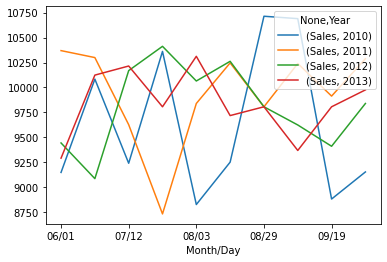

In [13]:
new_piv.plot()

#### Output explained:
Even though this graph looks messy, a few points do stand out:
- In 2010, late August and early September saw the highest sales ever recorded. 
- At the same time, there was a big dip in the 2010 sales right before and after the meteoric rise. 
- A similar slump was seen in 2011 in late July. 
- Sales for 2012 and 2013 seem to be stabilizing a lot more as compared to the first 2 years. 

As data analysts, all of these serve as areas for further investigation. 
- What was done differently in 2010 to achieve sales numbers as high as 10,713 and 10,689 in succession? 
- How can we avoid drastic dips in sales?

## Presentation

We've analyzed the data to the best of our abilities, we've seen the sales trends and we've come up with a few solid questions/hypotheses to ask around/test by communicating with the rest of the team. It may sound like the work here is done, but there is one final crucial step - presenting the data in a manner that is understandable by someone who's not a data nerd! 

The best way to present the sales data would be to retain the yearly sales but to break each year out into its own individual graph to avoid the cluttered mess and to cleary highlight the sales trend for each year. 

### Subplots
As we already know, Pandas uses Matplotlib to render its plots and graphs. And Matplotlib offers a method called `subplots()` which, as the name suggests, helps us plot more than one graph at a time. 

Read more about the method [here](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html).


### Figure and Axes
The first thing to note about `plt.subplots()` is that its output can be stored in two variables:
- a figure `fig`
    - Figure refers to the overall container that holds all the subplots inside it. So it's used whenever any kind of manipulation needs to be performed on the entire plot. 
    - For example, the title of the container is set using `fig`.
- axes `ax`
    - Axes gets confusing to many. Instead of thinking of them as the plural of an axis, Matplotlib's axes refer to the individual subplot inside the figure. It is used whenever any kind of manipulation needs to be performed on a subplot basis. 
    - For example, the data to be plotted in each subplot is set using `ax`. 
    
Intuitively, since there are more than 1 subplots within a figure, `ax` is an array. In our case, we'd like to render our subplots as 4 rows that fall within the same column, therefore we pass the value `4` to the `plt.subplots()` method and `ax` takes on the structure of a 1-dimensional array. 

### Data
As for the data to be passed into each subplot, we slice the pivot table in such a way so as to obtain yearly sales data for each subplot and use the `ax[i].plot()` method to specify the correct slice where `i` stands for the index of the array or in other words, the first, second, third or fourth subplot.

**Note:** Our pivot table, even though a DataFrame, doesn't have straightforward columns like we're used to. Our columns are made up of *Sales* as well as *Year*. Running the `info()` method on `new_piv` and looking at the columns will get you situated with how complex this DataFrame really is! Therefore, we access data in our pivot table very differently as compared to before. 

#### iloc
The keyword `iloc`, which stands for integer location, is used to slice the required data for our subplots with the use of integers instead of column names. The notation `[:, 0]` indicates all the rows at the 0th column. Run the command `new_piv.iloc[:, 0]` to see what slice of data I'm talking about! 

#### loc
In addition to `iloc`, Pandas offers another slicing technique known as `loc` that stands for location. Both `iloc` and `loc` are powerful when it comes to explicit location-based indexing and slicing of data. The Pandas hungry folks can read more about [indexing and selecting data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html). 

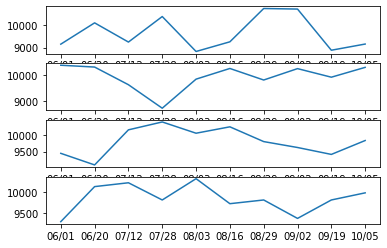

In [30]:
fig, ax = plt.subplots(4)
ax[0].plot(new_piv.iloc[:, 0])
ax[1].plot(new_piv.iloc[:, 1])
ax[2].plot(new_piv.iloc[:, 2])
ax[3].plot(new_piv.iloc[:, 3])

### Adding a title

What we have here is much better than our initial cluttered mess. We have managed to separate the sales by year but at the same time, these subplots aren't informative at all. Someone outside the team wouldn't have a clue about what they were looking at or how to read this graph! To them this would look like 4 lines, a bunch of numbers to the left and a bunch of numbers at the bottom! 

Surely, we can do better than that! Let's add a title that clearly indicates what we've been breaking our head on for the last three courses! 

**Note:** As mentioned previously, the title for the entire graph will be set using `fig`. 

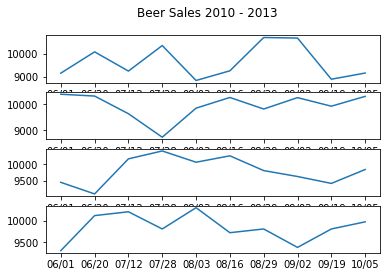

In [15]:
fig, ax = plt.subplots(4)
fig.suptitle('Beer Sales 2010 - 2013')
ax[0].plot(new_piv.iloc[:, 0])
ax[1].plot(new_piv.iloc[:, 1])
ax[2].plot(new_piv.iloc[:, 2])
ax[3].plot(new_piv.iloc[:, 3])

### Sharing axes

Not bad! We're getting there! The graph above clearly shows that we're plotting beer sales from 2010 through 2013 but if we look carefully at our x and y axis, they're not aligned. 

As for the x-axis:
- We can see the `Month/Day` clearly at the bottom but they seem to be getting overlapped for the top 3 graphs. 

As for the y-axis:
- The bottom 2 graphs label sales at 9,500 and 10,000 whereas the top 2 graphs label sales at 9,000 and 10,000. This tends to be misleading since the human eye will try to compare all 4 graphs at the same time, even though they may be representing vastly different sales numbers. 

We're going to use an attribute `sharex` and `sharey` to tell Matplotlib that we'd like all our subplots to be sharing the same x and y axis and to scale the trend lines accordingly. Both these attributes are Boolean values which we're going to set as `True`. 

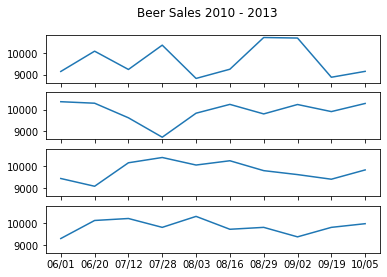

In [16]:
fig, ax = plt.subplots(4, sharex = True, sharey = True)
fig.suptitle('Beer Sales 2010 - 2013')
ax[0].plot(new_piv.iloc[:, 0])
ax[1].plot(new_piv.iloc[:, 1])
ax[2].plot(new_piv.iloc[:, 2])
ax[3].plot(new_piv.iloc[:, 3])

### Adding the final touch

Voila! That's informative as well as neat. 

Now for those of you with a keen eye who don't really want to see those little dashes poking out of the bottom of every subplot, Matplotlib's got something for you in the form of `gridspec_kw`! Basically it manipulates the grid properties within the figure. 

In our case, we'd like to remove the horizontal space between each subplot and therefore we assign the value `'hspace': 0` to `gridspec_kw`. 

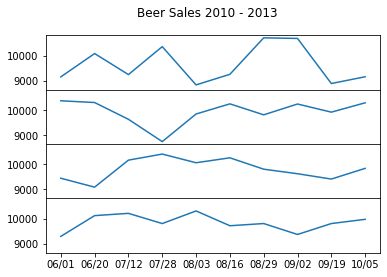

In [17]:
fig, ax = plt.subplots(4, sharex = True, sharey = True, gridspec_kw={'hspace': 0})
fig.suptitle('Beer Sales 2010 - 2013')
ax[0].plot(new_piv.iloc[:, 0])
ax[1].plot(new_piv.iloc[:, 1])
ax[2].plot(new_piv.iloc[:, 2])
ax[3].plot(new_piv.iloc[:, 3])

Woohoo! We've definitely come a long way from the first graph we rendered earlier up. 

## Conclusion

This graph, along with the scatter plot from the Baby Pandas course, is good enough to present to stakeholders coupled with insights, observed patterns, any anomalies they should be aware of and what trends they could expect in the near future. 

And that's a wrap on a data analytics project from start to finish! 

## Still can't get enough?!

These courses are by no means exhaustive and Pandas has a lot more to offer than what we covered. 

- Pick up another dataset and see how far you can go with Pandas! 
- Or to up the ante, take more than 1 dataset and figure out how to combine them into one. Would you [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html), [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) or [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)?!